In [1]:
import json
import random
import common
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
lang = "en"
diff = "easy"
excl = None

vocabs_pool: set[str] = set()  # for faster in operation
vocabs_pool_list: list[str] = []  # for consistent results
exclusive_pool: set[str] = set()
alphabets: list[str] = []

with open(rf"vocabs\{lang}\{lang}-{diff}.json") as file:
    json_data = json.load(file)
    for d in json_data:
        vocabs_pool.add(d)
        vocabs_pool_list.append(d)
        exclusive_pool.add(d)
        alphabets = list(set(alphabets).union(set(d)))

if excl is not None:
    with open(rf"vocabs\{lang}\{lang}-{excl}.json") as file:
        json_data = json.load(file)
        for d in json_data:
            exclusive_pool.remove(d)

vocabs_pool_list.sort()
alphabets.sort()
num_vocabs = len(vocabs_pool)
print(len(alphabets), "".join(alphabets))
print(f"{len(vocabs_pool)=}")
print(f"{len(exclusive_pool)=}")
print(vocabs_pool_list[:5])

26 abcdefghijklmnopqrstuvwxyz
len(vocabs_pool)=2575
len(exclusive_pool)=2575
['aback', 'abate', 'abbey', 'abbot', 'abhor']


In [3]:
config = {
    "easy": {"min_distance": 3, "max_distance": 5, "strict": True},
    "medium": {"min_distance": 4, "max_distance": 6, "strict": True},
    "hard": {"min_distance": 5, "max_distance": 8, "strict": True},
}

target_num_pairs = 3000
min_distance = config[diff]["min_distance"]
max_distance = config[diff]["max_distance"]
strict = config[diff]["strict"]

In [4]:
starter = set()
involved = set()
length_counters = defaultdict(lambda: 0)
distance_counters = defaultdict(lambda: 0)

pairs: list[tuple[str, str]] = []

random.seed(0)
while len(pairs) < target_num_pairs:
    v1 = random.choice(vocabs_pool_list)
    v2 = random.choice(vocabs_pool_list)

    if (v1, v2) in pairs or (v2, v1) in pairs:
        continue

    dist = common.distance(v1, v2, vocabs_pool, alphabets, max_distance=max_distance)
    if strict:
        difference = common.character_difference(v1, v2)
        is_valid = dist[0] > difference and dist[0] >= min_distance
    else:
        is_valid = dist[0] >= min_distance
    is_valid = is_valid and any(v in exclusive_pool for v in dist[1])

    if is_valid:
        pairs.append((v1, v2))
        length_counters[len(v1)] += 1
        distance_counters[dist[0]] += 1
        starter.add(v1)
        involved = involved.union(set(dist[1]))

        num_pair = len(pairs)
        if (num_pair + 1) % (target_num_pairs // 10) == 0:
            print(f'checking "{v1}"| {num_pair+1}/{target_num_pairs}')

checking "pick"| 300/3000
checking "wing"| 600/3000
checking "rake"| 900/3000
checking "hole"| 1200/3000
checking "ease"| 1500/3000
checking "rout"| 1800/3000
checking "pale"| 2100/3000
checking "steep"| 2400/3000
checking "bass"| 2700/3000
checking "hike"| 3000/3000


In [5]:
starter_rate = len(starter) / num_vocabs
print(f"starter: {len(starter)}/{num_vocabs} = {starter_rate:.2%}")

participation_rate = len(involved) / num_vocabs
print(f"participation: {len(involved)}/{num_vocabs} = {participation_rate:.2%}")

starter: 958/2575 = 37.20%
participation: 1249/2575 = 48.50%


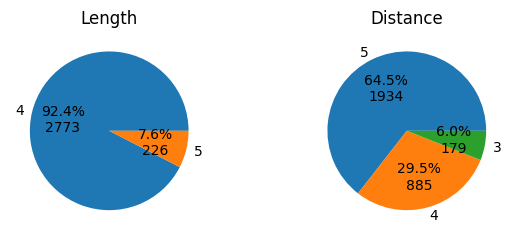

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(
    length_counters.values(),
    labels=length_counters.keys(),
    autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100*sum(length_counters.values()))}",
)
ax1.set_title("Length")

ax2.pie(
    distance_counters.values(),
    labels=distance_counters.keys(),
    autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100*sum(distance_counters.values()))}",
)
ax2.set_title("Distance")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [7]:
with open(rf"vocabs\{lang}\{lang}-pairs-{diff}.json", "w") as f:
    json.dump(pairs, f)

for i in range(5):
    pair = pairs[i]
    dist = common.distance(pair[0], pair[1], vocabs_pool, alphabets)
    print(dist)

(5, ['bass', 'base', 'bale', 'bile', 'bill', 'hill'])
(4, ['pork', 'cork', 'cock', 'lock', 'lick'])
(5, ['mend', 'bend', 'band', 'bank', 'tank', 'talk'])
(5, ['slum', 'slam', 'seam', 'seat', 'neat', 'next'])
(5, ['wool', 'cool', 'coil', 'boil', 'bail', 'bait'])
